# Кластеризація Частина 3: Методи на основі щільності

## Вступ до кластеризації на основі щільності

Кластеризація на основі щільності - це підхід, який групує точки даних на основі їх щільності в просторі ознак. На відміну від методів розбиття, таких як k-means, кластеризація на основі щільності може:

- **Знаходити кластери довільних форм** (не лише сферичні)
- **Ідентифікувати шум та викиди** автоматично
- **Визначати кількість кластерів** автоматично
- **Обробляти кластери з різною щільністю** (з деякими обмеженнями)

Основна ідея полягає в тому, що кластери є щільними областями точок даних, розділеними розрідженими областями. Це робить методи на основі щільності особливо корисними для реальних наборів даних, де кластери можуть мати неправильні форми або містити шум.

## Алгоритм DBSCAN

**DBSCAN** (Кластеризація на основі щільності просторових застосувань з шумом) - найпопулярніший алгоритм кластеризації на основі щільності. Він був введений Естером та ін. у 1996 році і залишається широко використовуваним сьогодні.

### Ключові концепції

#### 1. ε (Епсилон) Околиця
ε-околиця точки p визначається як:
$$N_{\varepsilon}(p) = \{q \in D | \text{dist}(p,q) \leq \varepsilon\}$$

Де:
- $D$ - набір даних
- $\text{dist}(p,q)$ - відстань між точками p та q
- $\varepsilon$ - параметр радіуса

#### 2. Параметр MinPts
MinPts - мінімальна кількість точок, необхідна для формування щільної області. Він допомагає розрізнити щільні та розріджені області.

#### 3. Класифікація точок

**Основна точка**: Точка p є основною точкою, якщо:
$$|N_{\varepsilon}(p)| \geq \text{MinPts}$$

**Гранична точка**: Точка q є граничною точкою, якщо:
- Вона не є основною точкою
- Вона знаходиться на відстані ε від принаймні однієї основної точки

**Точка шуму**: Точка, яка не є ні основною, ні граничною точкою.

![Типи точок](../images/8.0-Point-types.jpg)

[Джерело зображення](https://www.researchgate.net/publication/315326812_In-line_recognition_of_agglomerated_pharmaceutical_pellets_with_density-based_clustering_and_convolutional_neural_network)

### Кроки алгоритму DBSCAN

1. **Ініціалізація**: Позначити всі точки як невідвідані
2. **Для кожної невідвіданої точки p**:
   - Позначити p як відвідану
   - Якщо p є основною точкою:
     - Створити новий кластер C
     - Додати p до C
     - Додати всі точки в N_ε(p) до множини потенційних сусідів (seed set)
     - Для кожної точки q у множині потенційних сусідів:
       - Якщо q невідвідана, позначити як відвідану
       - Якщо q є основною точкою, додати N_ε(q) до множини потенційних сусідів
       - Якщо q ще не призначена до жодного кластера, додати q до C
   - Якщо p не є основною точкою, позначити як шум (якщо вона не стане граничною точкою пізніше)

### Ключові властивості

- **Довільні форми**: Може знаходити кластери будь-якої форми, не лише сферичні
- **Обробка шуму**: Автоматично ідентифікує та позначає точки шуму
- **Автоматична кількість кластерів**: Визначає кількість кластерів автоматично
- **На основі щільності**: Кластери є щільними областями, розділеними розрідженими областями

## DBSCAN vs K-Means: Ключові відмінності

| Аспект | K-Means | DBSCAN |
|--------|---------|---------|
| **Форма кластера** | Лише сферична | Довільні форми |
| **Кількість кластерів** | Потрібно визначити k | Визначається автоматично |
| **Обробка шуму** | Призначає всі точки до кластерів | Ідентифікує шум/викиди |
| **Чутливість до параметрів** | Чутлива до ініціалізації | Чутлива до ε та MinPts |
| **Масштабованість** | Добре для великих наборів даних | Може бути повільнішою для дуже великих наборів даних |
| **Щільність кластера** | Припускає подібні щільності | Може обробляти різні щільності |
| **Обробка викидів** | Додає викиди до кластерів | Позначає викиди як шум |

### Коли використовувати DBSCAN

**Використовуйте DBSCAN коли:**
- Ви не знаєте кількість кластерів
- Кластери можуть мати неправильні форми
- Вам потрібно ідентифікувати шум/викиди
- У вас різні щільності кластерів
- Ви хочете автоматичне відкриття кластерів

**Уникайте DBSCAN коли:**
- Вам потрібні сферичні кластери
- У вас високовимірні дані (прокляття розмірності)
- Вам потрібна дуже швидка кластеризація
- Всі точки повинні бути призначені до кластерів

## Практична реалізація з Scikit-Learn

Давайте реалізуємо DBSCAN, використовуючи scikit-learn, та дослідимо його поведінку на різних наборах даних. Ми почнемо з імпорту необхідних бібліотек та створення деяких зразкових наборів даних.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to explore density-based clustering!")

📚 Libraries imported successfully!
🔧 Ready to explore density-based clustering!


In [ ]:
# Create sample datasets to demonstrate DBSCAN capabilities
np.random.seed(42)

# Dataset 1: Two moons (non-spherical clusters)
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

# Dataset 2: Concentric circles
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.3, random_state=42)

# Dataset 3: Blobs with noise
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
# Add some noise points
noise = np.random.uniform(-6, 6, (20, 2))
X_blobs = np.vstack([X_blobs, noise])
y_blobs = np.hstack([y_blobs, [-1] * 20])  # -1 for noise

print("Created three different datasets:")
print(f"   • Moons dataset: {X_moons.shape[0]} points")
print(f"   • Circles dataset: {X_circles.shape[0]} points") 
print(f"   • Blobs with noise: {X_blobs.shape[0]} points")
print(" Each dataset has different clustering challenges!")

🎯 Created three different datasets:
   • Moons dataset: 300 points
   • Circles dataset: 300 points
   • Blobs with noise: 320 points
   📊 Each dataset has different clustering challenges!


/var/folders/jq/209h6ksd2wbc03t0j0mxk1bh0000gn/T/ipykernel_87727/974080297.py:22: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jq/209h6ksd2wbc03t0j0mxk1bh0000gn/T/ipykernel_87727/974080297.py:22: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/jq/209h6ksd2wbc03t0j0mxk1bh0000gn/T/ipykernel_87727/974080297.py:22: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/roman/.pyenv/versions/3.10.10/envs/data-mining-course/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/roman/.pyenv/versions/3.10.10/envs/data-mining-course/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figu

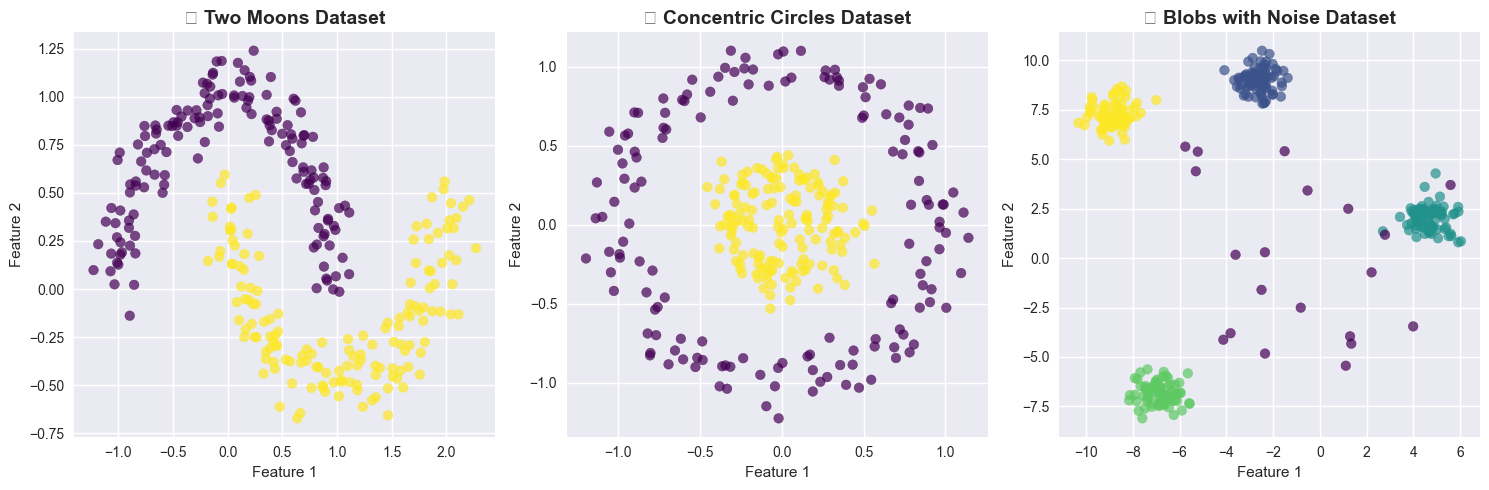

🎨 Dataset visualization complete!
   💡 Notice how each dataset presents different clustering challenges:
      • Moons: Non-spherical, curved clusters
      • Circles: Nested, non-convex clusters
      • Blobs: Traditional clusters with added noise points


In [ ]:
# Visualize the datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot moons
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', alpha=0.7)
axes[0].set_title('Two Moons Dataset', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Plot circles
axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis', alpha=0.7)
axes[1].set_title('Concentric Circles Dataset', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Plot blobs with noise
scatter = axes[2].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis', alpha=0.7)
axes[2].set_title('Blobs with Noise Dataset', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("Dataset visualization complete!")
print("  Notice how each dataset presents different clustering challenges:")
print("    • Moons: Non-spherical, curved clusters")
print("    • Circles: Nested, non-convex clusters") 
print("    • Blobs: Traditional clusters with added noise points")

In [ ]:
# Now let's apply DBSCAN with different parameters
def apply_dbscan_and_visualize(X, eps, min_samples, title, true_labels=None):
    """
    Apply DBSCAN and visualize the results
    """
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X)
    
    # Count clusters and noise points
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_noise = list(cluster_labels).count(-1)
    
    # Create visualization
    plt.figure(figsize=(12, 5))
    
    # Plot 1: True labels (if available)
    if true_labels is not None:
        plt.subplot(1, 2, 1)
        scatter = plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
        plt.title(f'True Labels\n{title}', fontsize=12, fontweight='bold')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    
    # Plot 2: DBSCAN results
    plt.subplot(1, 2, 2)
    unique_labels = set(cluster_labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black for noise points
            col = 'black'
            marker = 'x'
            size = 50
            alpha = 0.8
        else:
            marker = 'o'
            size = 30
            alpha = 0.7
            
        class_member_mask = (cluster_labels == k)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=alpha)
    
    plt.title(f'DBSCAN Results\nε={eps}, MinPts={min_samples}\nClusters: {n_clusters}, Noise: {n_noise}', 
              fontsize=12, fontweight='bold')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()
    
    return cluster_labels, n_clusters, n_noise

print("DBSCAN visualization function created!")
print("This will help us see how different parameters affect clustering results")

🎯 DBSCAN visualization function created!
   📊 This will help us see how different parameters affect clustering results


🌙 Testing DBSCAN on Moons Dataset

🔍 Testing with ε = 0.1, MinPts = 4


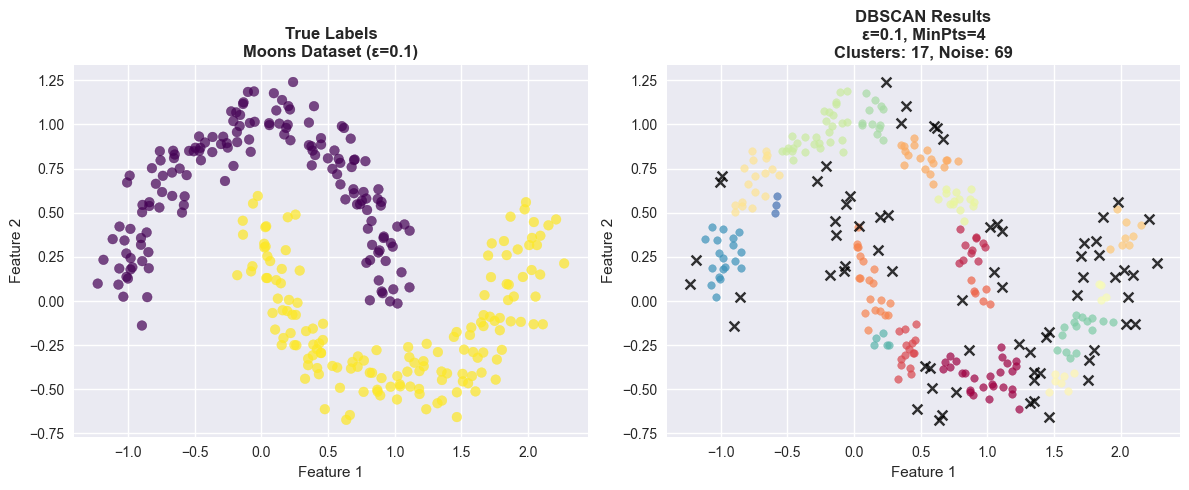

   📊 Found 17 clusters and 69 noise points
   ⚠️  Too many clusters - epsilon might be too small

🔍 Testing with ε = 0.2, MinPts = 4


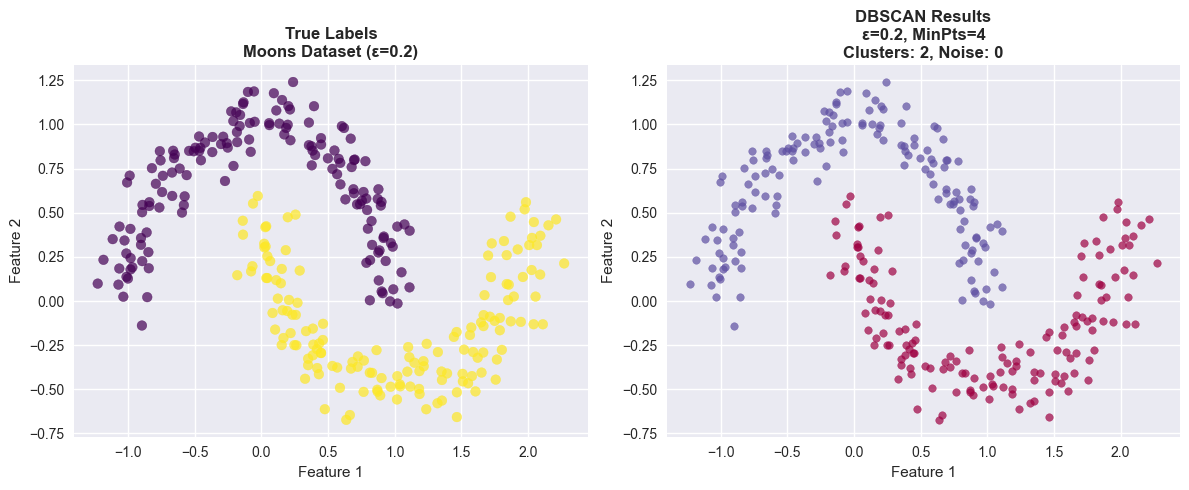

   📊 Found 2 clusters and 0 noise points
   ✅ Perfect! Found the expected 2 clusters

🔍 Testing with ε = 0.3, MinPts = 4


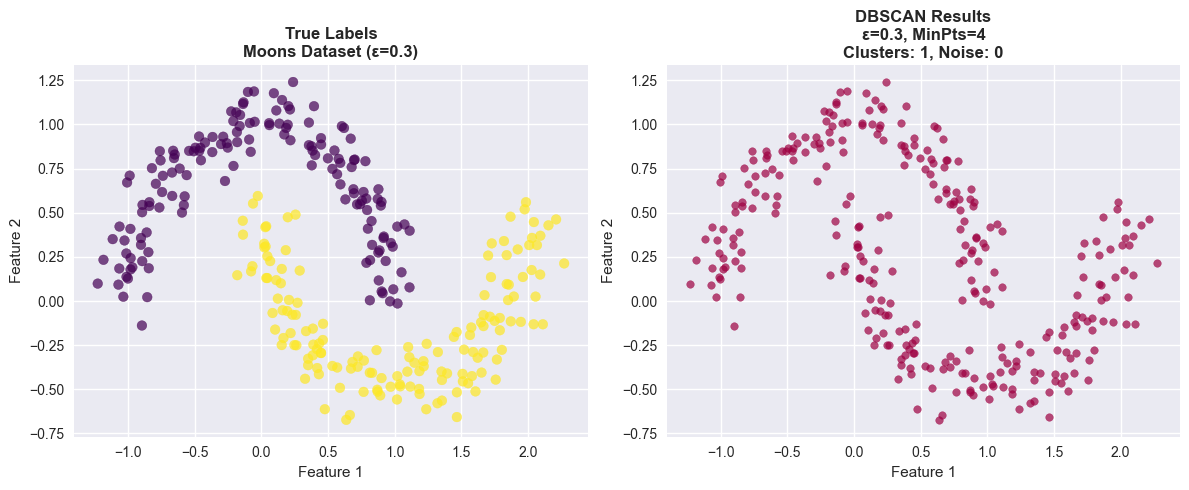

   📊 Found 1 clusters and 0 noise points
   ⚠️  Too few clusters - epsilon might be too large

🔍 Testing with ε = 0.4, MinPts = 4


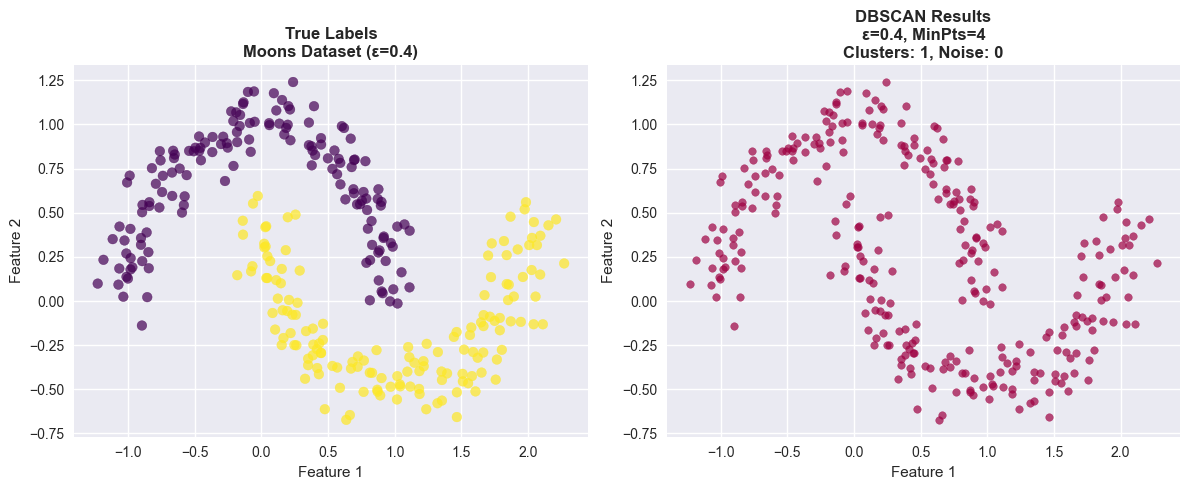

   📊 Found 1 clusters and 0 noise points
   ⚠️  Too few clusters - epsilon might be too large


In [ ]:
# Let's test DBSCAN on the moons dataset with different epsilon values
print("Testing DBSCAN on Moons Dataset")
print("=" * 50)

# Based on the k-distance graph, let's try different epsilon values
eps_values = [0.1, 0.2, 0.3, 0.4]

for eps in eps_values:
    print(f"\nTesting with ε = {eps}, MinPts = 4")
    labels, n_clusters, n_noise = apply_dbscan_and_visualize(
        X_moons, eps, 4, f"Moons Dataset (ε={eps})", y_moons
    )
    print(f"   📊 Found {n_clusters} clusters and {n_noise} noise points")
    
    # Check if we found the right number of clusters
    if n_clusters == 2:
        print("Perfect! Found the expected 2 clusters")
    elif n_clusters > 2:
        print("Too many clusters - epsilon might be too small")
    else:
        print("Too few clusters - epsilon might be too large")



⭕ Testing DBSCAN on Circles Dataset

🔍 Testing with ε = 0.1, MinPts = 4


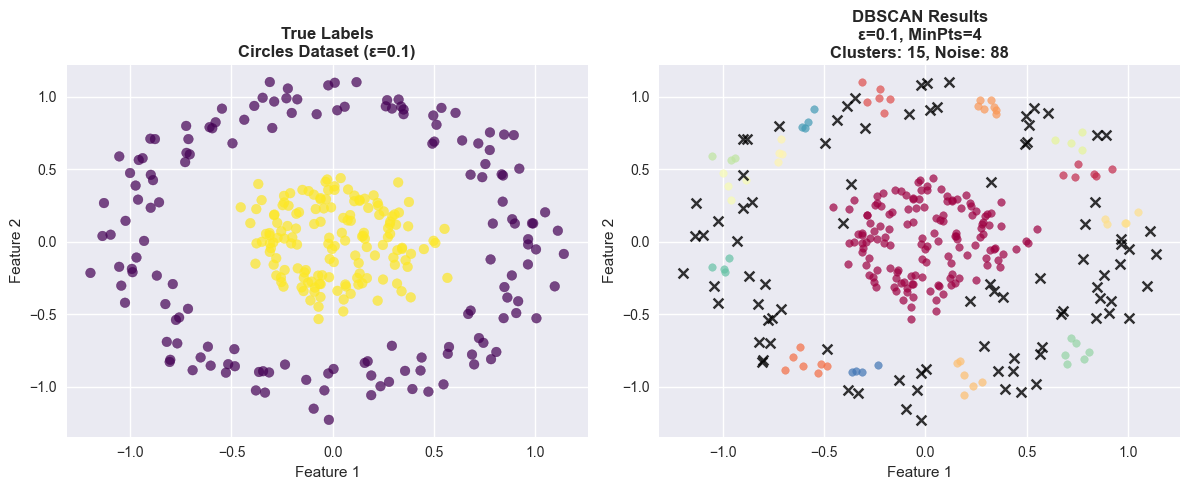

   📊 Found 15 clusters and 88 noise points
   ⚠️  Too many clusters - epsilon might be too small

🔍 Testing with ε = 0.2, MinPts = 4


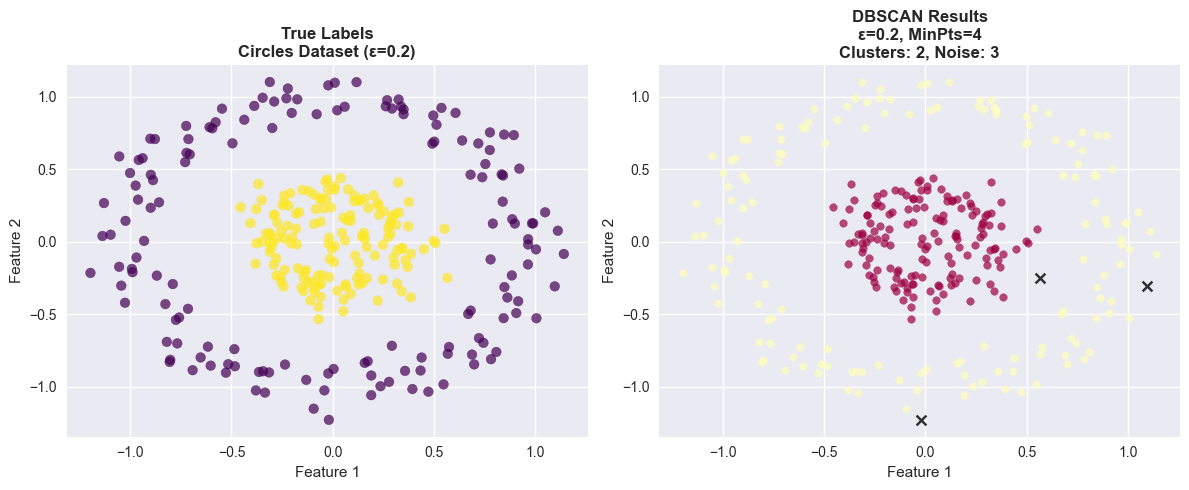

   📊 Found 2 clusters and 3 noise points
   ✅ Perfect! Found the expected 2 clusters

🔍 Testing with ε = 0.3, MinPts = 4


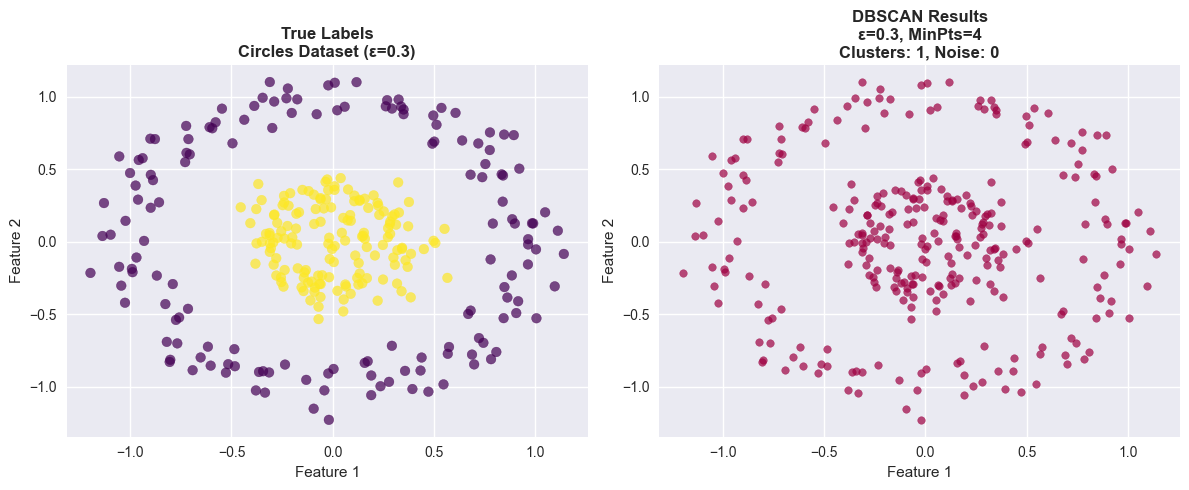

   📊 Found 1 clusters and 0 noise points
   ⚠️  Too few clusters - epsilon might be too large

🔍 Testing with ε = 0.4, MinPts = 4


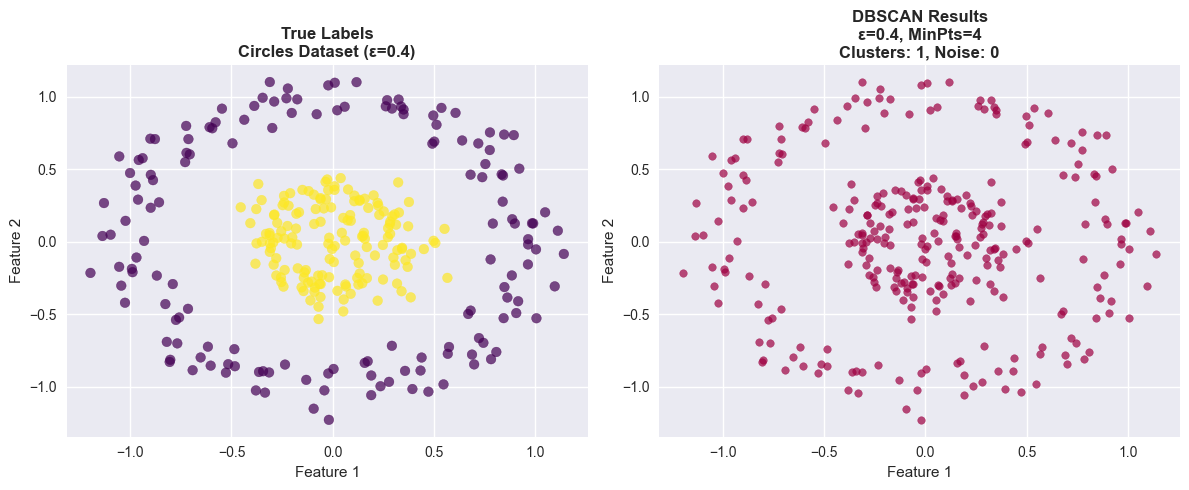

   📊 Found 1 clusters and 0 noise points
   ⚠️  Too few clusters - epsilon might be too large


In [ ]:
# Now let's test on the circles dataset
print("\nTesting DBSCAN on Circles Dataset")
print("=" * 50)

# For circles, we might need different parameters
eps_values_circles = [0.1, 0.2, 0.3, 0.4]

for eps in eps_values_circles:
    print(f"\nTesting with ε = {eps}, MinPts = 4")
    labels, n_clusters, n_noise = apply_dbscan_and_visualize(
        X_circles, eps, 4, f"Circles Dataset (ε={eps})", y_circles
    )
    print(f" Found {n_clusters} clusters and {n_noise} noise points")
    
    # Check if we found the right number of clusters
    if n_clusters == 2:
        print("Perfect! Found the expected 2 clusters")
    elif n_clusters > 2:
        print("Too many clusters - epsilon might be too small")
    else:
        print("Too few clusters - epsilon might be too large")


🔵 Testing DBSCAN on Blobs with Noise Dataset

🔍 Testing with ε = 0.3, MinPts = 4


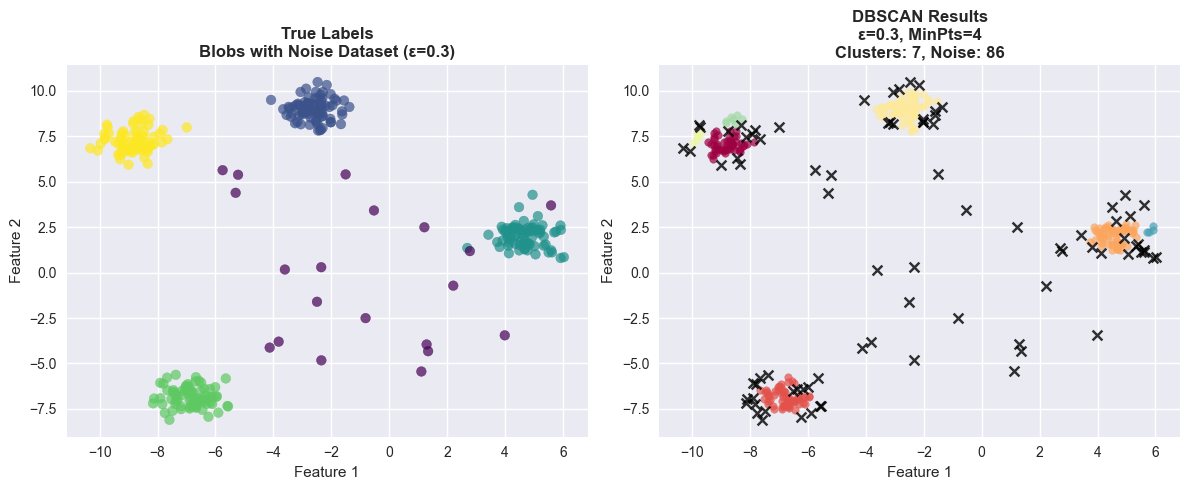

   📊 Found 7 clusters and 86 noise points
   ⚠️  Too many clusters - epsilon might be too small

🔍 Testing with ε = 0.5, MinPts = 4


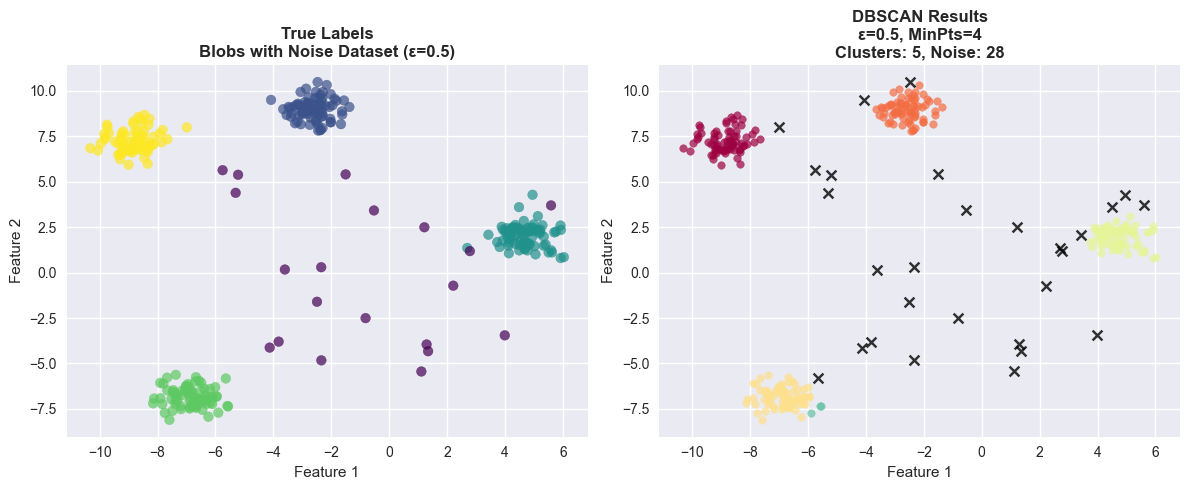

   📊 Found 5 clusters and 28 noise points
   ⚠️  Too many clusters - epsilon might be too small

🔍 Testing with ε = 0.7, MinPts = 4


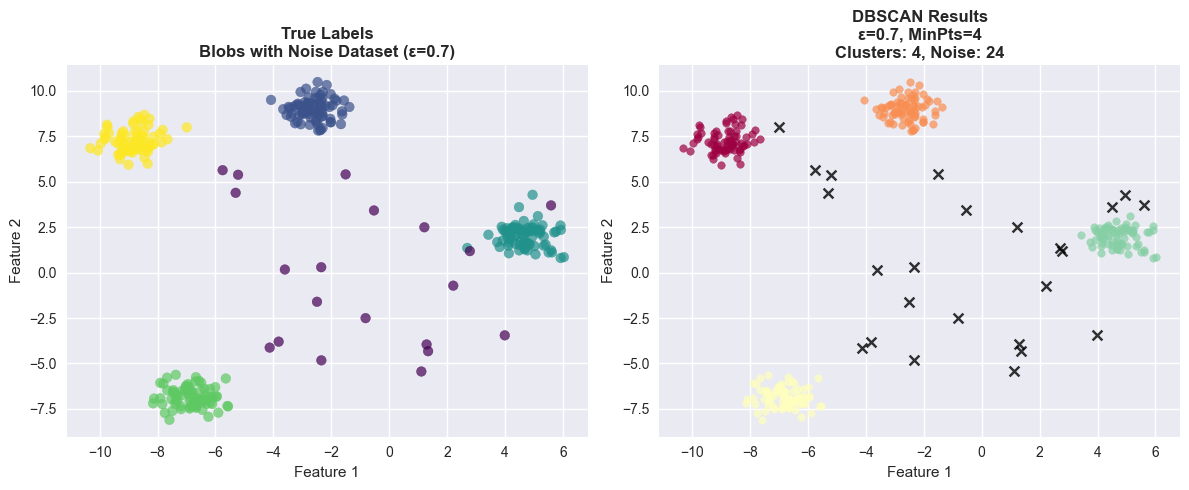

   📊 Found 4 clusters and 24 noise points
   ✅ Perfect! Found the expected 4 clusters

🔍 Testing with ε = 1.0, MinPts = 4


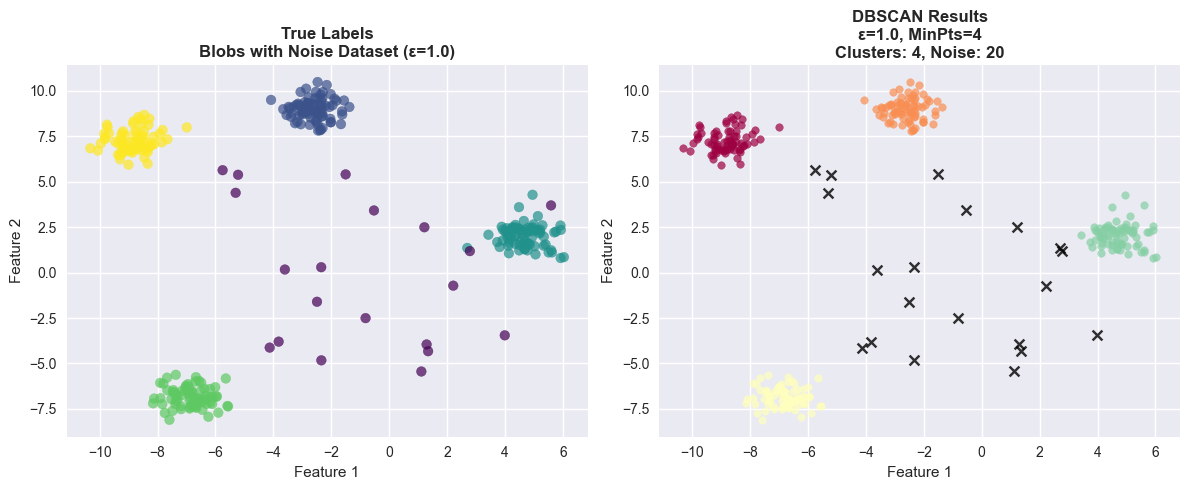

   📊 Found 4 clusters and 20 noise points
   ✅ Perfect! Found the expected 4 clusters


In [ ]:
# Let's test on the blobs with noise dataset
print("\nTesting DBSCAN on Blobs with Noise Dataset")
print("=" * 50)

# For blobs with noise, let's try different parameters
eps_values_blobs = [0.3, 0.5, 0.7, 1.0]

for eps in eps_values_blobs:
    print(f"\nTesting with ε = {eps}, MinPts = 4")
    labels, n_clusters, n_noise = apply_dbscan_and_visualize(
        X_blobs, eps, 4, f"Blobs with Noise Dataset (ε={eps})", y_blobs
    )
    print(f"   📊 Found {n_clusters} clusters and {n_noise} noise points")
    
    # Check if we found the right number of clusters
    if n_clusters == 4:
        print("Perfect! Found the expected 4 clusters")
    elif n_clusters > 4:
        print("Too many clusters - epsilon might be too small")
    else:
        print("Too few clusters - epsilon might be too large")


## OPTICS

**OPTICS** (Впорядкування точок для ідентифікації структури кластеризації) - це розширення DBSCAN, яке вирішує проблему чутливості до параметрів. Давайте детально дослідимо його ключові концепції.

### Основна відстань та відстань досяжності

Основа OPTICS полягає в двох ключових мірах відстані:

#### Основна відстань (CD)
Для точки p основна відстань визначається як:
$$CD(p) = \begin{cases} 
\text{невизначена} & \text{якщо } |N_{\varepsilon}(p)| < \text{MinPts} \\
\text{відстань до MinPts-го найближчого сусіда} & \text{якщо } |N_{\varepsilon}(p)| \geq \text{MinPts}
\end{cases}$$

**Ключові моменти:**
- Визначається лише для основних точок (точок з принаймні MinPts сусідами)
- Представляє мінімальне значення ε, для якого точка була б основною точкою
- Менша основна відстань = щільніша околиця

#### Відстань досяжності (RD)
Відстань досяжності від точки p до точки o:
$$RD(p,o) = \max(CD(p), \text{dist}(p,o))$$

**Ключові моменти:**
- Завжди визначена (на відміну від основної відстані)
- Представляє мінімальне значення ε, для якого o є безпосередньо досяжною за щільністю від p
- Якщо p не є основною точкою, RD(p,o) = ∞
- Якщо p є основною точкою, RD(p,o) = max(CD(p), відстань між p та o)

### Кроки алгоритму OPTICS

1. **Ініціалізація**: Встановити всі точки як необроблені
2. **Для кожної необробленої точки p**:
   - Позначити p як оброблену
   - Обчислити основну відстань CD(p)
   - Якщо CD(p) визначена (p є основною точкою):
     - Додати p до впорядкування
     - Для кожної необробленої точки q в N_ε(p):
       - Обчислити відстань досяжності RD(p,q)
       - Додати q до множини потенційних сусідів з пріоритетом RD(p,q)
     - Поки множина потенційних сусідів не порожня:
       - Витягти точку з мінімальною відстанню досяжності
       - Позначити як оброблену та додати до впорядкування
       - Якщо вона є основною точкою, обробити її сусідів

### Ключові переваги OPTICS

- **Стійкість до параметрів**: Менш чутливий до параметра ε, ніж DBSCAN
- **Ієрархічна структура**: Може витягувати кластери на різних рівнях щільності
- **Візуалізація**: Графік досяжності показує структуру кластеризації
- **Гнучкість**: Може витягувати кластери з різними порогами щільності

In [ ]:
# Let's implement OPTICS using scikit-learn
from sklearn.cluster import OPTICS

print("Implementing OPTICS Algorithm")
print("=" * 40)

# Create a dataset with varying densities to demonstrate OPTICS capabilities
np.random.seed(42)

# Create a dataset with three clusters of different densities
# Dense cluster
dense_cluster = np.random.normal([2, 2], 0.3, (100, 2))

# Medium density cluster  
medium_cluster = np.random.normal([-2, 2], 0.6, (80, 2))

# Sparse cluster
sparse_cluster = np.random.normal([0, -2], 1.0, (60, 2))

# Some noise points
noise = np.random.uniform(-4, 4, (30, 2))

# Combine all data
X_mixed_density = np.vstack([dense_cluster, medium_cluster, sparse_cluster, noise])
y_mixed_density = np.hstack([np.zeros(100), np.ones(80), np.full(60, 2), np.full(30, -1)])

print(f"Created mixed density dataset with {X_mixed_density.shape[0]} points")
print("   • Dense cluster: 100 points (std=0.3)")
print("   • Medium cluster: 80 points (std=0.6)")  
print("   • Sparse cluster: 60 points (std=1.0)")
print("   • Noise: 30 points")


🔧 Implementing OPTICS Algorithm
📊 Created mixed density dataset with 270 points
   • Dense cluster: 100 points (std=0.3)
   • Medium cluster: 80 points (std=0.6)
   • Sparse cluster: 60 points (std=1.0)
   • Noise: 30 points


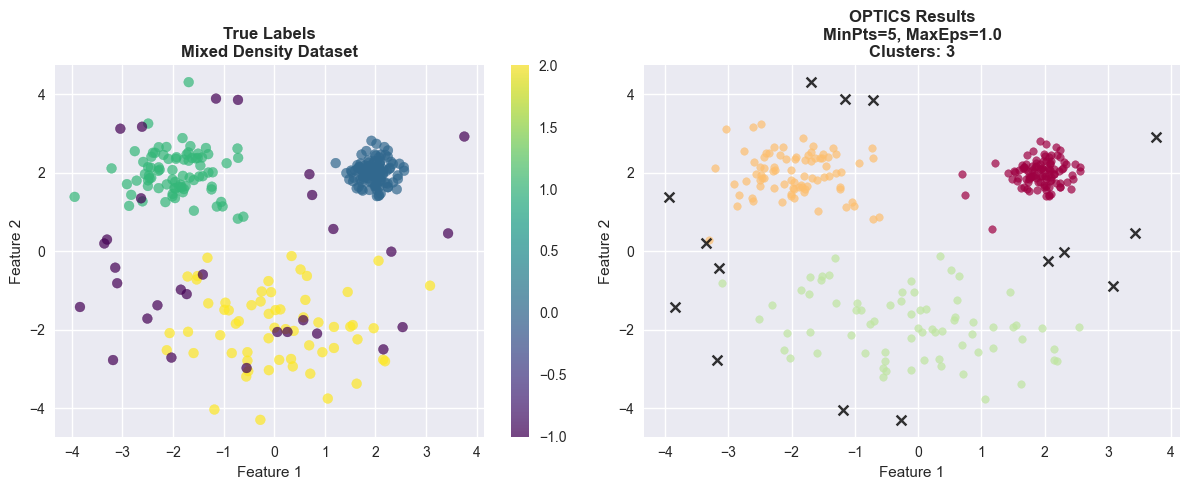

🎯 OPTICS clustering complete!
   📊 Found 3 clusters and 15 noise points


In [ ]:
# Visualize the mixed density dataset
plt.figure(figsize=(12, 5))

# Plot true labels
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_mixed_density[:, 0], X_mixed_density[:, 1], c=y_mixed_density, 
                     cmap='viridis', alpha=0.7, s=50)
plt.title('True Labels\nMixed Density Dataset', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)

# Apply OPTICS
plt.subplot(1, 2, 2)
max_eps = 1.0
optics = OPTICS(min_samples=5, max_eps=max_eps, cluster_method="dbscan")
optics_labels = optics.fit_predict(X_mixed_density)

# Plot OPTICS results
unique_labels = set(optics_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'black'
        marker = 'x'
        size = 50
        alpha = 0.8
    else:
        marker = 'o'
        size = 30
        alpha = 0.7
        
    class_member_mask = (optics_labels == k)
    xy = X_mixed_density[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=alpha)

plt.title(f'OPTICS Results\nMinPts=5, MaxEps={max_eps}\nClusters: {len(set(optics_labels))-1}', 
          fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("OPTICS clustering complete!")
print(f"  Found {len(set(optics_labels))-1} clusters and {list(optics_labels).count(-1)} noise points")

📈 Creating OPTICS Reachability Plot


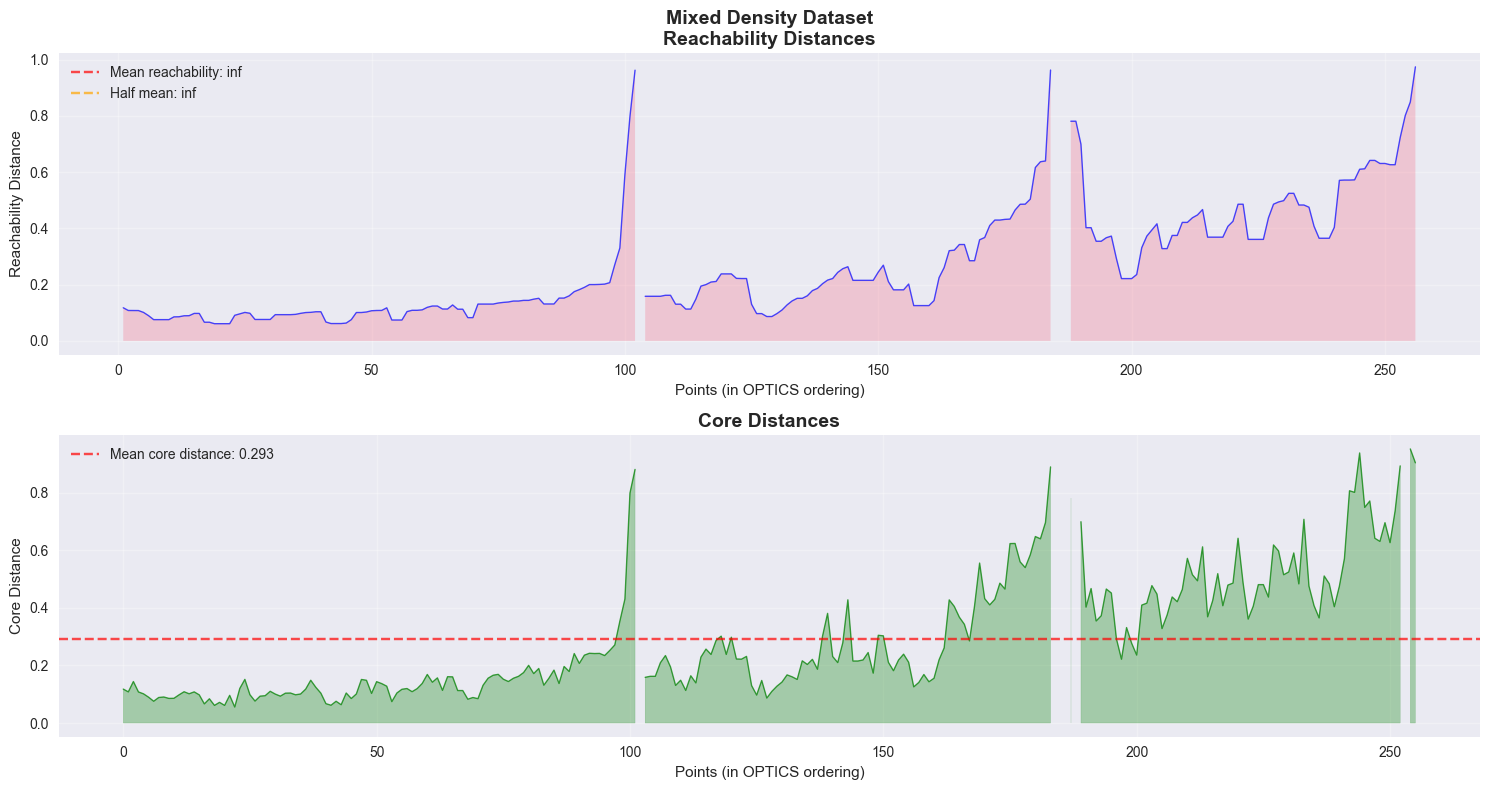

📊 Reachability Plot Analysis:
   • Mean reachability distance: inf
   • Mean core distance: 0.293
   • Number of peaks in reachability: 2
   💡 Valleys in the reachability plot indicate potential cluster boundaries


In [ ]:
# Create the reachability plot - the key visualization for OPTICS
def plot_reachability_plot(optics_model, title="OPTICS Reachability Plot"):
    """
    Plot the reachability plot from OPTICS results
    """
    # Get the ordering and reachability distances
    ordering = optics_model.ordering_
    reachability = optics_model.reachability_[ordering]
    core_distances = optics_model.core_distances_[ordering]
    
    # Create the plot
    plt.figure(figsize=(15, 8))
    
    # Plot reachability distances
    plt.subplot(2, 1, 1)
    plt.plot(range(len(reachability)), reachability, 'b-', linewidth=1, alpha=0.7)
    plt.fill_between(range(len(reachability)), reachability, alpha=0.3)
    plt.title(f'{title}\nReachability Distances', fontsize=14, fontweight='bold')
    plt.xlabel('Points (in OPTICS ordering)')
    plt.ylabel('Reachability Distance')
    plt.grid(True, alpha=0.3)
    
    # Add horizontal lines to show potential cluster boundaries
    # Look for "valleys" in the reachability plot
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(reachability, height=np.mean(reachability))
    
    # Plot some threshold lines
    mean_reach = np.mean(reachability)
    plt.axhline(y=mean_reach, color='red', linestyle='--', alpha=0.7, 
                label=f'Mean reachability: {mean_reach:.3f}')
    plt.axhline(y=mean_reach/2, color='orange', linestyle='--', alpha=0.7, 
                label=f'Half mean: {mean_reach/2:.3f}')
    
    plt.legend()
    
    # Plot core distances
    plt.subplot(2, 1, 2)
    plt.plot(range(len(core_distances)), core_distances, 'g-', linewidth=1, alpha=0.7)
    plt.fill_between(range(len(core_distances)), core_distances, alpha=0.3, color='green')
    plt.title('Core Distances', fontsize=14, fontweight='bold')
    plt.xlabel('Points (in OPTICS ordering)')
    plt.ylabel('Core Distance')
    plt.grid(True, alpha=0.3)
    
    # Add horizontal lines for core distance thresholds
    mean_core = np.mean(core_distances[core_distances != np.inf])
    plt.axhline(y=mean_core, color='red', linestyle='--', alpha=0.7, 
                label=f'Mean core distance: {mean_core:.3f}')
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("Reachability Plot Analysis:")
    print(f"   • Mean reachability distance: {mean_reach:.3f}")
    print(f"   • Mean core distance: {mean_core:.3f}")
    print(f"   • Number of peaks in reachability: {len(peaks)}")
    print("   Valleys in the reachability plot indicate potential cluster boundaries")

# Generate the reachability plot
print("Creating OPTICS Reachability Plot")
print("=" * 40)
plot_reachability_plot(optics, "Mixed Density Dataset")